# 第6章: 機械学習

## 50. データの入手・整形
https://archive.ics.uci.edu/ml/datasets/News+Aggregator
をダウンロードし、以下の要領で学習データ（train.txt），検証データ（valid.txt），評価データ（test.txt）を作成せよ．

1. ダウンロードしたzipファイルを解凍し，readme.txtの説明を読む．
2. 情報源（publisher）が”Reuters”, “Huffington Post”, “Businessweek”, “Contactmusic.com”, “Daily Mail”の事例（記事）のみを抽出する．
3. 抽出された事例をランダムに並び替える．
4. 抽出された事例の80%を学習データ，残りの10%ずつを検証データと評価データに分割し，それぞれtrain.txt，valid.txt，test.txtというファイル名で保存する．ファイルには，１行に１事例を書き出すこととし，カテゴリ名と記事見出しのタブ区切り形式とせよ（このファイルは後に問題70で再利用する）．

<br>学習データと評価データを作成したら，各カテゴリの事例数を確認せよ．

In [3]:
# 50.2
import pandas as pd
from sklearn.model_selection import train_test_split

file_name = "newsCorpora.csv"
df = pd.read_csv(file_name, sep='\t', header=None, names=["ID", "TITLE", "URL", "PUBLISHER", "CATEGORY", "STORY", "HOSTNAME", "TIMESTAMP"])

df[:6]

,ID,TITLE,URL,PUBLISHER,CATEGORY,STORY,HOSTNAME,TIMESTAMP
0,1,"Fed official says weak data caused by weather,...",http://www.latimes.com/business/money/la-fi-mo...,Los Angeles Times,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.latimes.com,1394470370698
1,2,Fed's Charles Plosser sees high bar for change...,http://www.livemint.com/Politics/H2EvwJSK2VE6O...,Livemint,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.livemint.com,1394470371207
2,3,US open: Stocks fall after Fed official hints ...,http://www.ifamagazine.com/news/us-open-stocks...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,1394470371550
3,4,"Fed risks falling 'behind the curve', Charles ...",http://www.ifamagazine.com/news/fed-risks-fall...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,1394470371793
4,5,Fed's Plosser: Nasty Weather Has Curbed Job Gr...,http://www.moneynews.com/Economy/federal-reser...,Moneynews,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.moneynews.com,1394470372027
5,6,Plosser: Fed May Have to Accelerate Tapering Pace,http://www.nasdaq.com/article/plosser-fed-may-...,NASDAQ,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.nasdaq.com,1394470372212


In [4]:
df = df[df["PUBLISHER"].isin(["Reuters", "Huffington Post", "Businessweek", "Contactmusic.com", "Daily Mail"])]
print(df)

            ID                                              TITLE  \
12          13       Europe reaches crunch point on banking union   
13          14  ECB FOCUS-Stronger euro drowns out ECB's messa...   
19          20  Euro Anxieties Wane as Bunds Top Treasuries, S...   
20          21  Noyer Says Strong Euro Creates Unwarranted Eco...   
29          30  REFILE-Bad loan triggers key feature in ECB ba...   
...        ...                                                ...   
422300  422819     UN: Ebola Could Eventually Infect 20000 People   
422301  422820  Ebola toll tops 1550, continues to accelerate ...   
422302  422821  UPDATE 1-Ebola toll tops 1550, outbreak accele...   
422309  422828  Ebola Cases May Surpass 20000, WHO Says in Upd...   
422319  422838  Air France suspends flights to Ebola-hit Sierr...   

                                                      URL        PUBLISHER  \
12      http://in.reuters.com/article/2014/03/10/eu-ba...          Reuters   
13      http://

In [5]:
#50.3
train, val_test = train_test_split(df, test_size=0.2, random_state=42, shuffle=True, stratify=df['CATEGORY'])
valid, test = train_test_split(val_test, test_size=0.5, random_state=42, shuffle=True, stratify=val_test['CATEGORY'])

train[["CATEGORY", "TITLE"]].to_csv('./data/train.txt', sep='\t', index=False)
valid[["CATEGORY", "TITLE"]].to_csv('./data/valid.txt', sep='\t', index=False)
test[["CATEGORY", "TITLE"]].to_csv('./data/test.txt', sep='\t', index=False)

print("-----train-----")
print(train["CATEGORY"].value_counts())
print("-----valid-----")
print(valid["CATEGORY"].value_counts())
print("-----test-----")
print(test["CATEGORY"].value_counts())

-----train-----
CATEGORY
b    4502
e    4223
t    1219
m     728
Name: count, dtype: int64
-----valid-----
CATEGORY
b    562
e    528
t    153
m     91
Name: count, dtype: int64
-----test-----
CATEGORY
b    563
e    528
t    152
m     91
Name: count, dtype: int64


## 51. 特徴量抽出Permalink
学習データ，検証データ，評価データから特徴量を抽出し，それぞれtrain.feature.txt，valid.feature.txt，test.feature.txtというファイル名で保存せよ． なお，カテゴリ分類に有用そうな特徴量は各自で自由に設計せよ．記事の見出しを単語列に変換したものが最低限のベースラインとなるであろう．

In [6]:
import string
import re

def preprocessing_text(text):
    for p in string.punctuation:
        text = text.replace(p, " ") 
    text = text.lower()
    text = re.sub('[0-9]+', '0', text)
    return text

In [7]:
train['TITLE'] = train['TITLE'].map(preprocessing_text)
valid['TITLE'] = valid['TITLE'].map(preprocessing_text)
test['TITLE'] = test['TITLE'].map(preprocessing_text)

In [8]:
# CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
train_count = vectorizer.fit_transform(train['TITLE'])
valid_count = vectorizer.transform(valid['TITLE'])
test_count = vectorizer.transform(test['TITLE'])

print(test_count.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [9]:
train_count = pd.DataFrame(train_count.toarray(), columns=vectorizer.get_feature_names_out())
valid_count = pd.DataFrame(valid_count.toarray(), columns=vectorizer.get_feature_names_out())
test_count = pd.DataFrame(test_count.toarray(), columns=vectorizer.get_feature_names_out())

In [10]:
train_count.to_csv('./data_count/train.feature.txt', sep='\t', index=False)
valid_count.to_csv('./data_count/valid.feature.txt', sep='\t', index=False)
test_count.to_csv('./data_count/test.feature.txt', sep='\t', index=False)

train_count.loc[0][train_count.loc[0]>0]

and           1
birthday      1
celebrates    1
daughter      1
day           1
father        1
first         1
kanye         2
west          2
Name: 0, dtype: int64

## 52. 学習
51で構築した学習データを用いて，ロジスティック回帰モデルを学習せよ．

In [11]:
# ラベル（カテゴリ）抽出
train_y = pd.read_csv('./data/train.txt', sep='\t')
valid_y = pd.read_csv('./data/valid.txt', sep='\t')
test_y = pd.read_csv('./data/test.txt', sep='\t')

train_y = train_y["CATEGORY"]
valid_y = valid_y["CATEGORY"]
test_y = test_y["CATEGORY"]

# モデル学習
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=42)  # random_state=42参数用于设置随机种子，以确保结果的可复现性
model.fit(train_count, train_y)

c:\Users\14153\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

## 53. 予測
52で学習したロジスティック回帰モデルを用い，与えられた記事見出しからカテゴリとその予測確率を計算するプログラムを実装せよ．

In [12]:
model.predict(valid_count)

array(['b', 'b', 'b', ..., 'e', 'b', 'b'], dtype=object)

In [13]:
model.predict_proba(valid_count)

array([[8.70612284e-01, 9.87278687e-02, 1.54306105e-02, 1.52292370e-02],
       [9.99631850e-01, 1.01567478e-04, 2.05738478e-04, 6.08445012e-05],
       [6.34040085e-01, 2.01827051e-01, 1.70884938e-02, 1.47044370e-01],
       ...,
       [4.66536648e-03, 9.87930893e-01, 3.73858224e-03, 3.66515783e-03],
       [9.99842275e-01, 7.31571908e-05, 2.09929788e-05, 6.35748723e-05],
       [9.98349467e-01, 2.62434652e-04, 2.51219200e-04, 1.13687906e-03]])

In [14]:
import numpy as np
def score(model, texts):
    probs = model.predict_proba(texts).max(axis=1)
    preds = model.predict(texts)
    return np.stack([probs, preds],axis=1)

In [15]:
score(model, valid_count)

array([[0.8706122838641369, 'b'],
       [0.9996318495425097, 'b'],
       [0.6340400850086224, 'b'],
       ...,
       [0.9879308934524649, 'e'],
       [0.9998422749580942, 'b'],
       [0.9983494670909975, 'b']], dtype=object)

## 54. 正解率の計測
52で学習したロジスティック回帰モデルの正解率を，学習データおよび評価データ上で計測せよ

In [16]:
from sklearn.metrics import accuracy_score

pred_y_train = model.predict(train_count)
pred_y_test = model.predict(test_count)
print(f"train_accuracy：{accuracy_score(train_y, pred_y_train)}")
print(f"test_accuracy：{accuracy_score(test_y, pred_y_test)}")

train_accuracy：0.9960644677661169
test_accuracy：0.9265367316341829


## 55. 混同行列の作成
52で学習したロジスティック回帰モデルの混同行列（confusion matrix）を，学習データおよび評価データ上で作成せよ．

In [17]:
from sklearn.metrics import confusion_matrix

train_predictions = model.predict(train_count)
test_predictions = model.predict(test_count)

train_confusion_matrix = confusion_matrix(train_y, train_predictions)
test_confusion_matrix = confusion_matrix(test_y, test_predictions)

print("----train confusion matrix----")
print(train_confusion_matrix)
print("----test confusion matrix----")
print(test_confusion_matrix)

----train confusion matrix----
[[4488    3    1   10]
 [   6 4215    1    1]
 [   2    1  725    0]
 [  13    4    0 1202]]
----test confusion matrix----
[[542  10   1  10]
 [  8 519   0   1]
 [ 12  11  66   2]
 [ 25  16   2 109]]


## 56. 適合率，再現率，F1スコアの計測
52で学習したロジスティック回帰モデルの適合率，再現率，F1スコアを，評価データ上で計測せよ．カテゴリごとに適合率，再現率，F1スコアを求め，カテゴリごとの性能をマイクロ平均（micro-average）とマクロ平均（macro-average）で統合せよ

In [25]:
class_precision = []
class_recall = []
class_f1_score = []

num_classes = test_confusion_matrix.shape[0]

for i in range(num_classes):
    true_positive = test_confusion_matrix[i, i]
    false_positive = test_confusion_matrix[:, i].sum() - true_positive
    false_negative = test_confusion_matrix[i, :].sum() - true_positive

    precision = true_positive / (true_positive + false_positive)
    recall = true_positive / (true_positive + false_negative)
    f1_score = 2 * (precision * recall) / (precision + recall)

    class_precision.append(precision)
    class_recall.append(recall)
    class_f1_score.append(f1_score)

for i in range(num_classes):
    print()
    print(f"適合率: {class_precision[i]}")
    print(f"再現率: {class_recall[i]}")
    print(f"F1スコア: {class_f1_score[i]}")
    print()


適合率: 0.9233390119250426
再現率: 0.9626998223801065
F1スコア: 0.942608695652174


適合率: 0.9334532374100719
再現率: 0.9829545454545454
F1スコア: 0.9575645756457564


適合率: 0.9565217391304348
再現率: 0.7252747252747253
F1スコア: 0.8250000000000001


適合率: 0.8934426229508197
再現率: 0.7171052631578947
F1スコア: 0.7956204379562043



## 57. 特徴量の重みの確認
52で学習したロジスティック回帰モデルの中で，重みの高い特徴量トップ10と，重みの低い特徴量トップ10を確認せよ．

In [26]:
weights = model.coef_[0]

top_positive_indices = weights.argsort()[-10:][::-1]
top_negative_indices = weights.argsort()[:10]

print("重みの高い特徴量トップ10:")



print("重みの低い特徴量トップ10:")



重みの高い特徴量トップ10:
重みの低い特徴量トップ10:


## 58. 正則化パラメータの変更
ロジスティック回帰モデルを学習するとき，正則化パラメータを調整することで，学習時の過学習（overfitting）の度合いを制御できる．異なる正則化パラメータでロジスティック回帰モデルを学習し，学習データ，検証データ，および評価データ上の正解率を求めよ．実験の結果は，正則化パラメータを横軸，正解率を縦軸としたグラフにまとめよ．

c:\Users\14153\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\14153\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

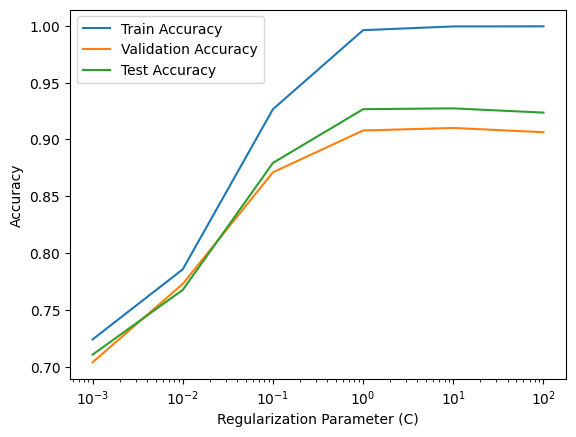

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# 正則化パラメータの範囲を定義
C_values = [0.001, 0.01, 0.1, 1, 10, 100]

# 正解率を保存するリスト
train_accuracy = []
valid_accuracy = []
test_accuracy = []

# 各正則化パラメータに対してモデルを学習し、正解率を計算
for C in C_values:
    model = LogisticRegression(C=C, random_state=42)
    model.fit(train_count, train_y)

    # 正解率を計算
    train_acc = model.score(train_count, train_y)
    valid_acc = model.score(valid_count, valid_y)
    test_acc = model.score(test_count, test_y)

    # 正解率をリストに追加
    train_accuracy.append(train_acc)
    valid_accuracy.append(valid_acc)
    test_accuracy.append(test_acc)

# グラフを作成
plt.plot(C_values, train_accuracy, label='Train Accuracy')
plt.plot(C_values, valid_accuracy, label='Validation Accuracy')
plt.plot(C_values, test_accuracy, label='Test Accuracy')
plt.xlabel('Regularization Parameter (C)')
plt.ylabel('Accuracy')
plt.xscale('log')
plt.legend()
plt.show()

## 59. ハイパーパラメータの探索
学習アルゴリズムや学習パラメータを変えながら，カテゴリ分類モデルを学習せよ．検証データ上の正解率が最も高くなる学習アルゴリズム・パラメータを求めよ．また，その学習アルゴリズム・パラメータを用いたときの評価データ上の正解率を求めよ．

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# 学習アルゴリズムとパラメータの候補を定義
models = [
    LogisticRegression(random_state=42),
    SVC(kernel='linear', random_state=42),
    RandomForestClassifier(random_state=42)
]


NameError: name 'ParameterGrid' is not defined